In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
import os
from fastbook import *
from fastdownload import download_url
from fastai.vision.widgets import *

In [3]:
key = "d3d77868961443c19c568d5491d5de60"
endpoint = "https://api.bing.microsoft.com/v7.0/images/search"

In [4]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [6]:

if not path.exists():
    path.mkdir(exist_ok=True)

NameError: name 'path' is not defined

In [5]:
results = search_images_bing(key, 'penguins')
ims = results.attrgot('contentUrl')
len(ims)


150

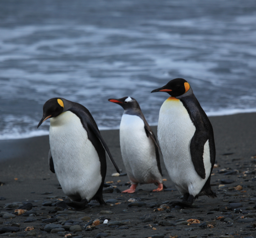

In [6]:
dest = 'images/penguin.jpg'
download_url(ims[0],dest)
im = Image.open(dest)
im.to_thumb(256,256)

In [7]:
penguin_types = 'adelie','chinstrap','emperor','gentoo'
path = Path('penguins')

In [8]:
if not path.exists():
    path.mkdir()
for o in penguin_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, f'{o} penguin')
    download_images(dest, urls=results.attrgot('contentUrl'))

In [9]:
fns = get_image_files(path)
fns

(#706) [Path('penguins/adelie/b6a99381-3d79-4c82-92b8-6aa498f24f26.jpg'),Path('penguins/adelie/e0b0088a-3ddd-4d7a-b700-deb06e036556.jpg'),Path('penguins/adelie/c9cf2e5e-659a-458c-a86c-6705fab15d94.jpg'),Path('penguins/adelie/6b60f091-0096-4c59-bde4-5a6136c87c27.jpg'),Path('penguins/adelie/7e03e98f-d132-4591-8b5f-7797e160a607.jpg'),Path('penguins/adelie/f7ac024e-012a-4bf0-b84d-5ceadbaf83b3.jpg'),Path('penguins/adelie/3a8c4c4a-3056-4edd-ac4e-f5ec08c4391e.jpg'),Path('penguins/adelie/9b6bc1f4-f6c8-49be-8537-7254498c5324.jpg'),Path('penguins/adelie/556c5b24-48c6-438a-8fb7-0a533c329cee.jpg'),Path('penguins/adelie/e2371bdd-3622-4ac5-9e31-984b25c1050b.jpg')...]

In [10]:
failed = verify_images(fns)
failed

(#14) [Path('penguins/chinstrap/6c657fb2-60b7-47c1-9421-46ef1ab1e155.jpg'),Path('penguins/chinstrap/e4477681-dcc4-47c0-b23d-3bcff39cdc6a.jpg'),Path('penguins/chinstrap/613a7e37-38a6-4210-8e62-4e4ad9cc49f6.jpg'),Path('penguins/chinstrap/43e70278-e7d1-453e-b4f4-7c02949b09f5.jpg'),Path('penguins/emperor/98ca95a6-974d-48a1-b7f2-6470e7bbb704.jpg'),Path('penguins/emperor/98b82d3d-568b-41f4-83a3-095e91679497.jpg'),Path('penguins/emperor/a92d7da5-8e23-42e2-8137-46e34e23d25f.jpg'),Path('penguins/emperor/73135c17-9e04-40c7-bfc0-6c076d0c96eb.jpg'),Path('penguins/emperor/36d497a3-c009-45b8-b55a-996f94661494.jpg'),Path('penguins/emperor/f17202ed-e9ac-4537-81f0-cff3d61d28be.jpg')...]

In [11]:
failed.map(Path.unlink);

In [12]:
??verify_images

Signature: verify_images(fns)
Source:   
def verify_images(fns):
    "Find images in `fns` that can't be opened"
    return L(fns[i] for i,o in enumerate(parallel(verify_image, fns)) if not o)
File:      ~/.local/lib/python3.11/site-packages/fastai/vision/utils.py
Type:      function

In [13]:
?verify_images

Signature: verify_images(fns)
Docstring: Find images in `fns` that can't be opened
File:      ~/.local/lib/python3.11/site-packages/fastai/vision/utils.py
Type:      function

In [14]:
??download_url

Signature: download_url(url, dest=None, timeout=None, show_progress=True)
Source:   
def download_url(url, dest=None, timeout=None, show_progress=True):
    "Download `url` to `dest` and show progress"
    pbar = progress_bar([])
    def progress(count=1, bsize=1, tsize=None):
        pbar.total = tsize
        pbar.update(count*bsize)
    return urlsave(url, dest, reporthook=progress if show_progress else None, timeout=timeout)
File:      ~/.local/lib/python3.11/site-packages/fastdownload/core.py
Type:      function

In [15]:
??results.attrgot

Signature: results.attrgot(k, default=None)
Docstring: Create new `L` with attr `k` (or value `k` for dicts) of all `items`.
Source:   
    def attrgot(self, k, default=None):
        return self.map(lambda o: o.get(k,default) if isinstance(o, dict) else nested_attr(o,k,default))
File:      ~/.local/lib/python3.11/site-packages/fastcore/foundation.py
Type:      method

In [16]:
# Creating DataLoaders
penguins = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label, # Just returns the name of the folder the file is present in
    item_tfms=Resize(128))

This command has given us a DataBlock object. This is like a template for creating a DataLoaders. We still need to tell fastai the actual source of our data—in this case, the path where the images can be found

In [17]:
dls = penguins.dataloaders(path)

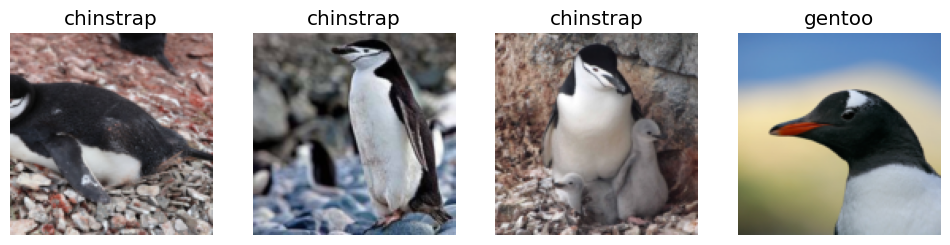

In [18]:
dls.train.show_batch(max_n=4, nrows=1)

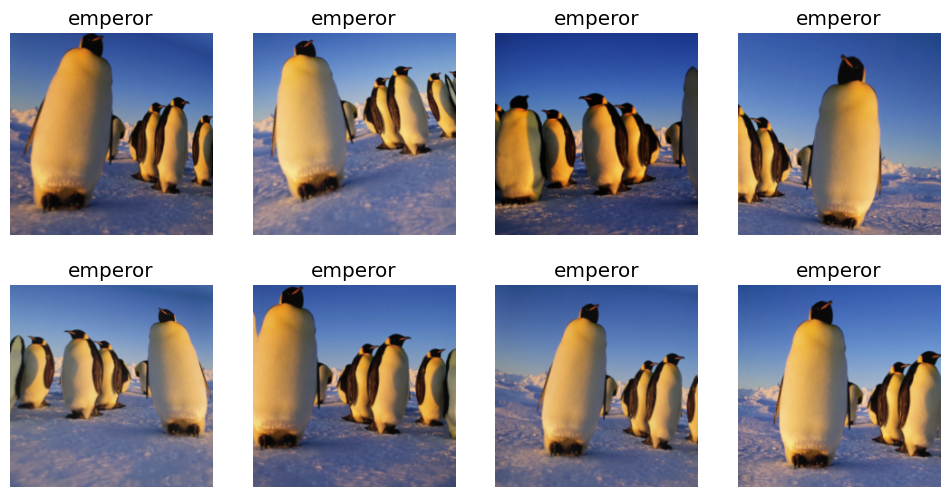

In [19]:
penguins = penguins.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5), 
    batch_tfms=aug_transforms())
dls = penguins.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [20]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/home/deep-thought/.local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/deep-thought/.local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,2.037332,1.091668,0.405797,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.813880,0.329153,0.123188,00:06
1,0.647585,0.171085,0.065217,00:06
2,0.533640,0.091675,0.043478,00:06
3,0.437876,0.086865,0.043478,00:06


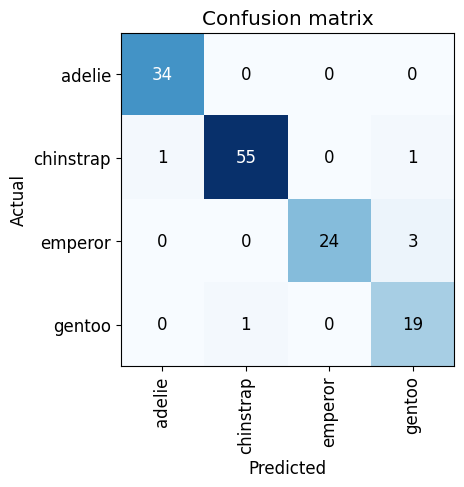

In [21]:
# Model evaluation using confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

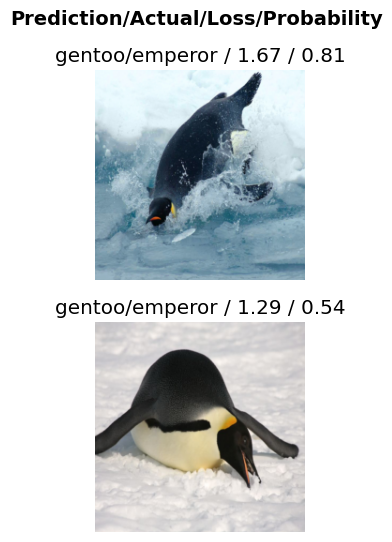

In [22]:
interp.plot_top_losses(2, nrows=2)

In [24]:
try:
    cleaner = ImageClassifierCleaner(learn)
except:
    pass
cleaner

In [25]:
# Exporting model
learn.export()

In [26]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [27]:
learn_inf = load_learner(path/'export.pkl')

In [28]:
learn_inf.predict('images/penguin.jpg')

('gentoo', tensor(3), tensor([6.8391e-04, 8.7019e-06, 3.8304e-01, 6.1626e-01]))

In [30]:
learn_inf.predict('images/pengu.jpeg')

('chinstrap', tensor(1), tensor([0.1506, 0.6907, 0.1553, 0.0035]))

In [31]:
learn_inf.predict('images/king_peng.jpg')

('emperor',
 tensor(2),
 tensor([1.0164e-04, 4.9406e-09, 9.9985e-01, 4.4964e-05]))

In [32]:
learn_inf.predict('images/adelie1.jpeg')

('emperor', tensor(2), tensor([0.1921, 0.0050, 0.7997, 0.0031]))

In [33]:
learn_inf.dls.vocab

['adelie', 'chinstrap', 'emperor', 'gentoo']

In [34]:
!pip install ipywidgets
!pip install voila

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for voila from https://files.pythonhosted.org/packages/af/f9/8198f5df14e3b54e0e0f6b3ea52e1087b78c9273b3b1693a1e308af07e10/voila-0.5.2-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.6/130.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 4.2 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.8.0
    Uninstalling nbclient-0.8.0:
      Successfully uninstalled nbclient-0.8.0


In [50]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [51]:
# the upload button cannot be clicked, defining it manually
btn_upload = SimpleNamespace(data = ['images/king_peng.jpg'])

In [52]:
img = PILImage.create(btn_upload.data[-1])

In [53]:
pred,pred_idx,probs = learn_inf.predict(img)

In [54]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: emperor; Probability: 0.9999')

In [55]:
# Button to do the classification
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [56]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [57]:
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [58]:
VBox([widgets.Label('Select your Penguin!'), 
      btn_upload, btn_run, out_pl, lbl_pred])